In [5]:
import numpy as np
np.set_printoptions(threshold=10000, suppress=True)
import pandas as pd
import matplotlib.pyplot as plt

# Partie 1

## Chargement et visualisation des données

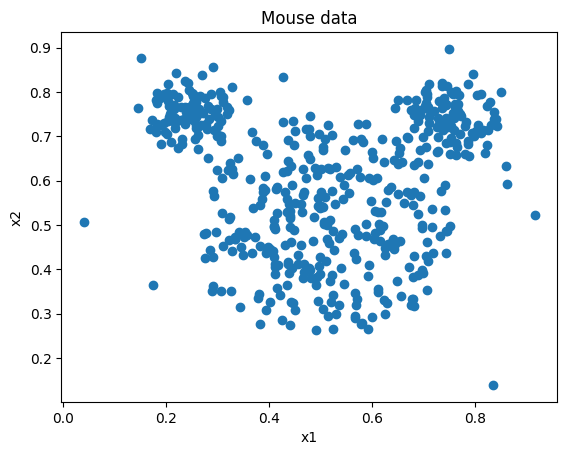

In [11]:
mickey = np.loadtxt('mouse.txt')
x1 = mickey[:,0]
x2 = mickey[:,1]

plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Mouse data')
plt.show()

## Isolation Forest

In [23]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=100, max_samples='auto')
iforest.fit(mickey)

df = pd.DataFrame(mickey)
df['scores'] = iforest.decision_function(mickey)
# -1 for outliers, 1 for inliers
df['anomaly'] = iforest.predict(mickey)
df.head(20)

,0,1,scores,anomaly
0,0.456601,0.432806,0.021806,1
1,0.611378,0.528625,0.039839,1
2,0.450299,0.711606,-0.002679,-1
3,0.639015,0.460744,0.026324,1
4,0.628957,0.323470,-0.008008,-1
5,0.566210,0.289358,-0.028436,-1
6,0.567653,0.295473,-0.022901,-1
7,0.436024,0.415776,0.036325,1
8,0.545414,0.367502,0.012029,1
9,0.439453,0.547867,0.050163,1


In [24]:
anomaly = df.loc[df['anomaly'] == -1]
anomaly_index = list(anomaly.index)
print(len(anomaly))

141


## Local Outlier Factor

In [21]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
pred = lof.fit_predict(mickey)

# -1 for outliers, 1 for inliers
print(pred)


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1

## Mieux choisir le seuil de contamination

In [58]:
contamination = [0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5]

print('Isolation Forest')
for c in contamination:
    iforest = IsolationForest(n_estimators=100, max_samples='auto', contamination=c)
    iforest.fit(mickey)
    df['scores'] = iforest.decision_function(mickey)
    df['anomaly'] = iforest.predict(mickey)
    anomaly = df.loc[df['anomaly'] == -1]
    anomaly_index = list(anomaly.index)
    print(len(anomaly))
    
print('Local Outlier Factor')
for c in contamination:
    lof = LocalOutlierFactor(n_neighbors=20, contamination=c)
    pred = lof.fit_predict(mickey)
    print(len([p for p in pred if p == -1]))

Isolation Forest
5
10
15
20
25
50
100
150
200
250
Local Outlier Factor
5
10
15
20
25
50
100
150
200
250


## Visualisation des données aberrantes

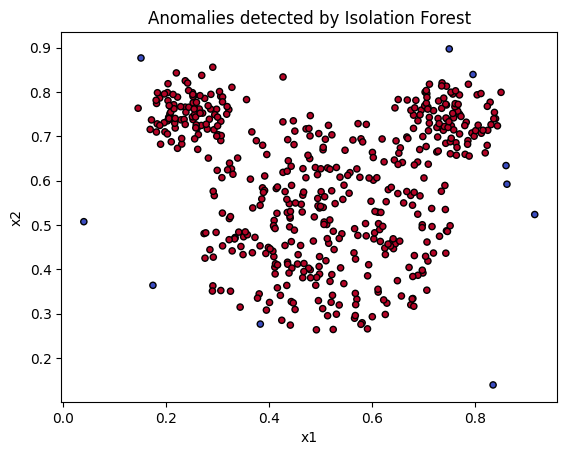

In [60]:
iforest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.02)
iforest.fit(mickey)
df['scores'] = iforest.decision_function(mickey)
df['anomaly'] = iforest.predict(mickey)
plt.scatter(x1, x2, c=df['anomaly'], cmap='coolwarm', s=20, edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Anomalies detected by Isolation Forest')
plt.show()

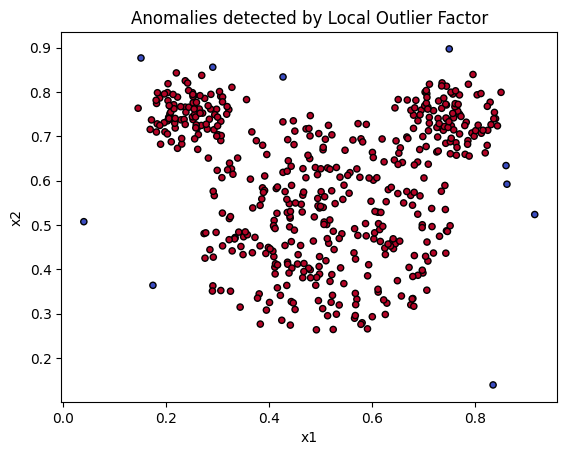

In [61]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
pred = lof.fit_predict(mickey)
plt.scatter(x1, x2, c=pred, cmap='coolwarm', s=20, edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Anomalies detected by Local Outlier Factor')
plt.show()

## Comparaison des méthodes